## Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)
print(keras.__version__)

2.8.0
2.8.0


## Load a dataset

In [2]:
fasion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fasion_mnist.load_data()

print(X_train_full.shape)
print(X_train_full.dtype)

(60000, 28, 28)
uint8


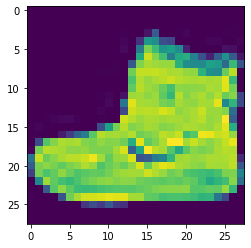

In [3]:
plt.imshow(X_train_full[0])
plt.show()

In [4]:
class_name=["T-shirt/top", "Trouser", "Pillover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankel boot"]

## Create validation set and scale pixel intensities down to the 0-1 range

In [5]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] /255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

## Creating the model using the Sequential API

Method 1

In [6]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

2022-03-22 17:28:55.562148: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Method 2

In [7]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

**model observation**

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.layers

In [10]:
hidden1 = model.layers[1]
hidden1.name

'dense_3'

In [11]:
weights, biases = hidden1.get_weights()
weights

array([[-0.05052055,  0.07208587, -0.02587957, ...,  0.06504478,
         0.05272929,  0.04500652],
       [-0.00895469,  0.04138553,  0.07132776, ..., -0.05440361,
         0.02652476,  0.009724  ],
       [-0.04761991,  0.00437016,  0.05876487, ...,  0.00238393,
        -0.05626288,  0.02982739],
       ...,
       [ 0.04016125, -0.04983333, -0.06996217, ...,  0.01821626,
         0.06117094, -0.0069335 ],
       [ 0.02180889,  0.02072062, -0.04131957, ..., -0.04201282,
         0.01783536,  0.04734427],
       [-0.02181625, -0.04036215,  0.05288179, ..., -0.02717753,
         0.00438832,  0.01785411]], dtype=float32)

In [12]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

**Compiling the model**

In [13]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=0.01),
              metrics=["accuracy"])

**Training and evaluatung model**

method1

In [14]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.6916 - accuracy: 0.7744 - val_loss: 0.4955 - val_accuracy: 0.8342
Epoch 2/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.4834 - accuracy: 0.8324 - val_loss: 0.4424 - val_accuracy: 0.8460
Epoch 3/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.4388 - accuracy: 0.8471 - val_loss: 0.4425 - val_accuracy: 0.8332
Epoch 4/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.4117 - accuracy: 0.8552 - val_loss: 0.3886 - val_accuracy: 0.8654
Epoch 5/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.3930 - accuracy: 0.8604 - val_loss: 0.3840 - val_accuracy: 0.8676
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3764 - accuracy: 0.8675 - val_loss: 0.3923 - val_accuracy: 0.8606
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3633 - accuracy: 0.8716 - val_loss: 0.3620 - val_accuracy:

(0.0, 1.0)

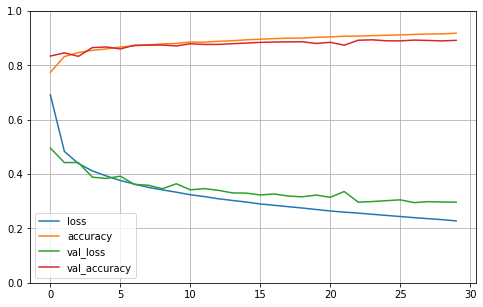

In [15]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.ylim(0, 1)

method2

In [16]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=0.01),
              metrics=["accuracy"])

In [17]:
history = model.fit(X_train, y_train, epochs=60,
                    validation_split=0.2,
                    batch_size=32)

Epoch 1/60
1375/1375 [==============================] - 2s 2ms/step - loss: 0.7811 - accuracy: 0.7460 - val_loss: 0.5451 - val_accuracy: 0.8125
Epoch 2/60
1375/1375 [==============================] - 2s 1ms/step - loss: 0.5127 - accuracy: 0.8218 - val_loss: 0.4884 - val_accuracy: 0.8274
Epoch 3/60
1375/1375 [==============================] - 2s 1ms/step - loss: 0.4619 - accuracy: 0.8405 - val_loss: 0.4991 - val_accuracy: 0.8180
Epoch 4/60
1375/1375 [==============================] - 2s 1ms/step - loss: 0.4318 - accuracy: 0.8495 - val_loss: 0.4367 - val_accuracy: 0.8449
Epoch 5/60
1375/1375 [==============================] - 2s 2ms/step - loss: 0.4100 - accuracy: 0.8567 - val_loss: 0.4317 - val_accuracy: 0.8451
Epoch 6/60
1375/1375 [==============================] - 2s 1ms/step - loss: 0.3924 - accuracy: 0.8617 - val_loss: 0.4045 - val_accuracy: 0.8606
Epoch 7/60
1375/1375 [==============================] - 2s 1ms/step - loss: 0.3785 - accuracy: 0.8668 - val_loss: 0.3910 - val_accuracy:

(0.0, 1.0)

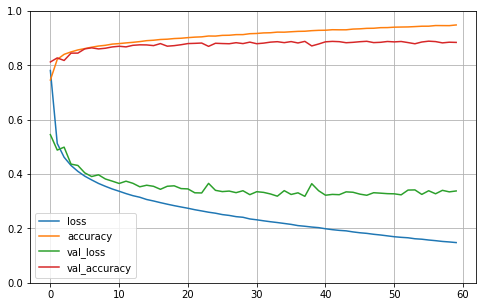

In [18]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.ylim(0, 1)

**Evaluate the model on the test set**

In [19]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 87.5429 - accuracy: 0.8409


[87.54292297363281, 0.8409000039100647]

**Use model to make prediction**

In [20]:
X_new = X_test[:3]
predict_x = model.predict(X_new)
predict_x

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

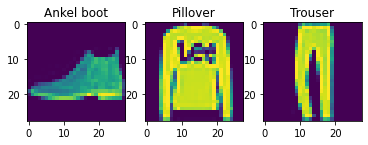

In [21]:
plt.subplot(1,3,1)
plt.title(class_name[y_test[0]])
plt.imshow(X_test[0])
plt.subplot(1,3,2)
plt.title(class_name[y_test[1]])
plt.imshow(X_test[1])
plt.subplot(1,3,3)
plt.title(class_name[y_test[2]])
plt.imshow(X_test[2])

In [22]:
classes_x = np.argmax(predict_x, axis=1)
classes_x

array([9, 2, 1])

In [23]:
np.array(class_name)[classes_x]

array(['Ankel boot', 'Pillover', 'Trouser'], dtype='<U11')